In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize

### Question 1

plotting S($\omega$, q) against $\omega$ at q = (0.2, 1.4, 2.6) Å$^{-1}$

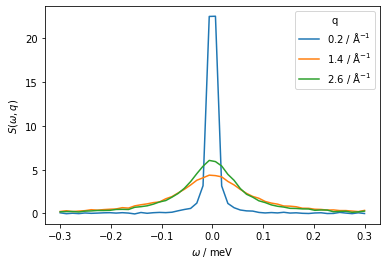

In [2]:
from QENS_assessment_module import q_0_2, q_0_6, q_1_0, q_1_4, q_1_8, q_2_2, q_2_6, q_3_0

plt.plot(q_0_2[0], q_0_2[1], label = '0.2 / Å$^{-1}$')
plt.plot(q_1_4[0], q_1_4[1], label = '1.4 / Å$^{-1}$')
plt.plot(q_2_6[0], q_2_6[1], label = '2.6 / Å$^{-1}$')

plt.ylabel('$S(\omega, q)$')
plt.xlabel('$\omega$ / meV')
plt.legend(title = 'q')
plt.show()

### Question 2

Testing Lorentzian model with A = 1, gamma = 0.05 meV and omega_0 = 0 meV for q = 1.4 Å$^{-1}$.

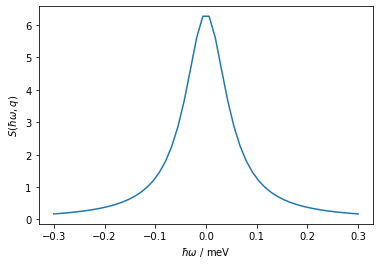

In [3]:
from QENS_assessment_module import Lorentzian_model

check_model_S = Lorentzian_model(q_1_4[0], 1, 0.05, 0)
plt.plot(q_1_4[0], check_model_S)
plt.ylabel('$S(\hbar \omega, q)$')
plt.xlabel('$\hbar \omega$ / meV')
plt.show()

Non-linear regression performed on curve to obtain optimised parameters and associated uncertainties.

In [4]:
popt, pcov = curve_fit(Lorentzian_model, q_1_4[0], q_1_4[1], sigma = q_1_4[2])
uncert = np.sqrt(pcov)

print('Optimised parameters:')
print(f'A = {popt[0]} +/- {uncert[0][0]}')
print(f'gamma = {popt[1]} +/- {uncert[1][1]} meV')
print(f'omega_0 = {popt[2]} +/- {uncert[2][2]} meV')

Optimised parameters:
A = 0.9902801670056202 +/- 0.004230246290869885
gamma = 0.0730595149918137 +/- 0.0005224103676349041 meV
omega_0 = -0.0011803747422914294 +/- 0.0003288106347845888 meV


<ipython-input-4-ac5a11f9f6a7>:2: RuntimeWarning: invalid value encountered in sqrt
  uncert = np.sqrt(pcov)


Optimised model plotted on top of experimental data - good fit observed.

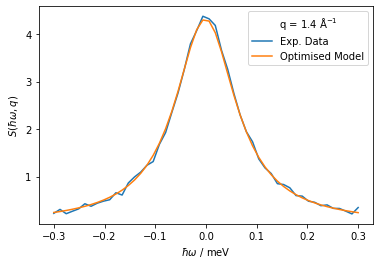

In [5]:
opt_model_S = Lorentzian_model(q_1_4[0], popt[0], popt[1], popt[2])

plt.plot(q_1_4[0], q_1_4[1], label = 'Exp. Data')
plt.plot(q_1_4[0], opt_model_S, label = 'Optimised Model')
plt.ylabel('$S(\hbar \omega, q)$')
plt.xlabel('$\hbar \omega$ / meV')
plt.legend(title = 'q = 1.4 Å$^{-1}$')
plt.show()

The fitted value of $\omega_0$ is -1.1803747422914294e$^{-3}$ $\pm$ 3.2881063478458884e$^{-4}$ meV. The fitted peak of the optimised model is therefore slightly negative and on the left of $\omega$ = 0 meV.

Best fit parameters and uncertainties determined for all eight datasets, stored in variables and then all eight optimised models plotted on top of the experimental data.

<ipython-input-6-3e0cd56d2311>:13: RuntimeWarning: invalid value encountered in sqrt
  uncert = np.sqrt(pcov)


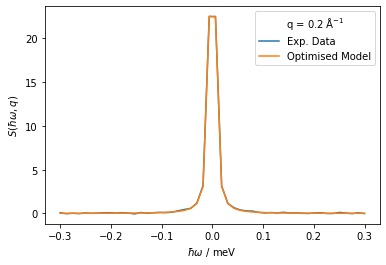

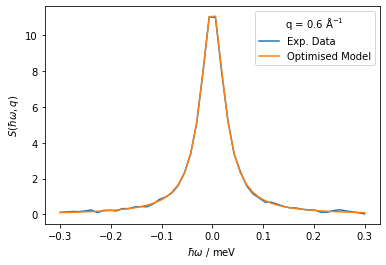

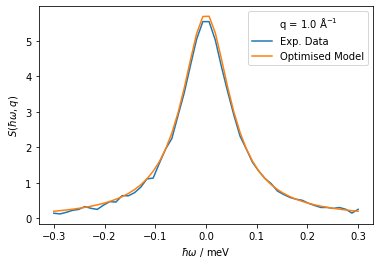

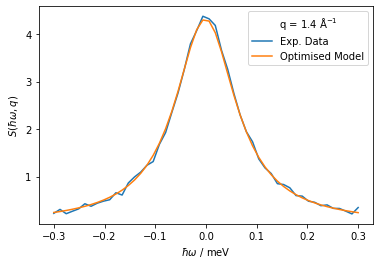

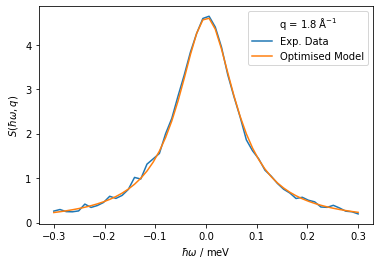

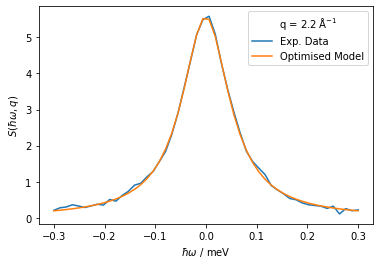

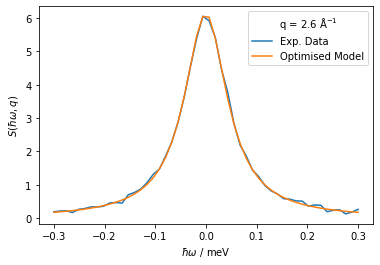

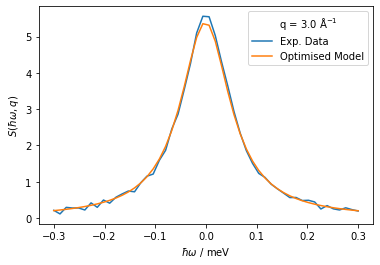

In [6]:
datasets = [q_0_2, q_0_6, q_1_0, q_1_4, q_1_8, q_2_2, q_2_6, q_3_0]
q = [0.2, 0.6, 1.0, 1.4, 1.8, 2.2, 2.6, 3.0]

A = []
gamma = []
omega_0 = []
A_uncert = []
gamma_uncert = []
omega_0_uncert = []

for i in range(8):
    popt, pcov = curve_fit(Lorentzian_model, datasets[i][0], datasets[i][1], sigma = datasets[i][2])
    uncert = np.sqrt(pcov)
    
    A.append(popt[0])
    gamma.append(popt[1])
    omega_0.append(popt[2])
    A_uncert.append(uncert[0][0])
    gamma_uncert.append(uncert[1][1])
    omega_0_uncert.append(uncert[2][2])

for j in range(8):
    opt_model_S = Lorentzian_model(datasets[j][0], A[j], gamma[j], omega_0[j])
    
    plt.plot(datasets[j][0], datasets[j][1], label = 'Exp. Data')
    plt.plot(datasets[j][0], opt_model_S, label = 'Optimised Model')
    plt.ylabel('$S(\hbar \omega, q)$')
    plt.xlabel('$\hbar \omega$ / meV')
    plt.legend(title = f'q = {round(q[j], 2)}'' Å$^{-1}$')
    plt.show()

### Question 3

Plotting the fitted values of $\gamma$ against q.

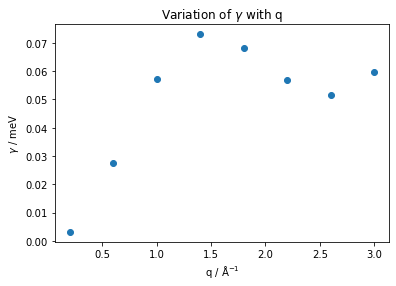

In [7]:
plt.plot(q, gamma, 'o')
plt.title('Variation of $\gamma$ with q')
plt.xlabel('q / Å$^{-1}$')
plt.ylabel('$\gamma$ / meV')
plt.show()

Fitting the fitted values of $\gamma$ to the Chudley-Elliot and Random-Jump diffusion models to estimate the values of diffusion coefficient, D, and jump distance, l.

In [8]:
from QENS_assessment_module import Chudley_Elliot_model
ce_popt, ce_pcov = curve_fit(Chudley_Elliot_model, q, gamma)

from QENS_assessment_module import random_jump_model
rj_popt, rj_pcov = curve_fit(random_jump_model, q, gamma)

from QENS_assessment_module import unit_conv

print('Chudley-Elliot diffusion model:')
print(f'D = {unit_conv(ce_popt[0])} +/- {unit_conv(ce_pcov[0][0])} cm^2 s^-1')
print(f'l = {ce_popt[1]} +/- {ce_pcov[1][1]} Å')
print()
print('Random-Jump diffusion model:')
print(f'D = {unit_conv(rj_popt[0])} +/- {unit_conv(rj_pcov[0][0])} cm^2 s^-1')
print(f'l = {rj_popt[1]} +/- {rj_pcov[1][1]} Å')

Chudley-Elliot diffusion model:
D = 1.3998829302891569e-05 +/- 3.147999495437182e-10 cm^2 s^-1
l = 3.032061846258243 +/- 0.000557370371411139 Å

Random-Jump diffusion model:
D = 5.60585875051269e-06 +/- 6.110404963467138e-08 cm^2 s^-1
l = 1.8312994326974201 +/- 0.30751306401034195 Å


Testing diffusion models with D = 0.1 Å$^{^2}$ meV and l = 4 Å

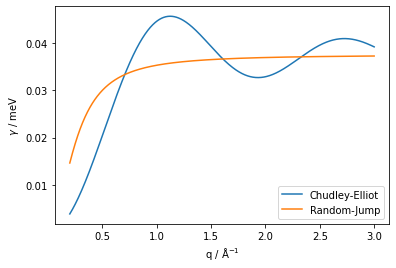

In [9]:
gv = np.linspace(min(q), max(q), 1000) # generated q values

plt.plot(gv, Chudley_Elliot_model(gv, 0.1, 4), label = 'Chudley-Elliot')
plt.plot(gv, random_jump_model(gv, 0.1, 4), label = 'Random-Jump')
plt.xlabel('q / Å$^{-1}$')
plt.ylabel('$\gamma$ / meV')
plt.legend()
plt.show()

Plotting the two optimised models on top of the experimental data.

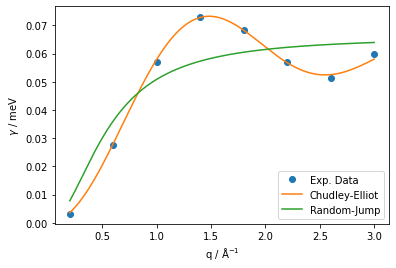

In [10]:
plt.plot(q, gamma, 'o', label = 'Exp. Data')
plt.plot(gv, Chudley_Elliot_model(gv, ce_popt[0], ce_popt[1]), label = 'Chudley-Elliot')
plt.plot(gv, random_jump_model(gv, rj_popt[0], rj_popt[1]), label = 'Random-Jump')
plt.xlabel('q / Å$^{-1}$')
plt.ylabel('$\gamma$ / meV')
plt.legend()
plt.show()

The Chudley-Elliot diffusion model fits the experimental data very well whereas, the Random-Jump diffusion model has a poor fit.

Literature values for Li$_2$S:\
D = 1.39 x 10$^{-5}$ cm$^2$ s$^{-1}$\
l = 2.957 Å\
Values generated by the Chudley-Elliot model:\
D = 1.3998829305624092e$^{-5}$ $\pm$ 3.147999434503813e$^{-10}$ cm$^2$ s$^{-1}$\
l = 3.0320618465641482 $\pm$ 5.573703723534742e$^{-4}$ Å

Although the literature values do not lie within the uncertainty of the model, there is good agreement for the D and l parameters.

Literature values for Li$_2$S:\
D = 1.39 x 10$^{-5}$ cm$^2$ s$^{-1}$\
l = 2.957 Å\
Values generated by the Random-Jump model:\
D = 5.60585875051269e$^{-6}$ $\pm$ 6.110404963467117e$^{-8}$ cm$^2$ s$^{-1}$\
l = 1.8312994326974201 $\pm$ 3.075130640103408e$^{-1}$ Å

For the Random-Jump model however, the generated values are very different to the values recorded in the literature. The diffusion coefficient from the model is ≈ 2.5x smaller, as well as the random walk step size being ≈ 1.6x smaller.

### Question 4

To achieve the same S values whilst keeping A constant, the value of $\omega$ (energy transfer) could be changed as this value is related to the incident and scattered energies. The greater the energy of the incident neutron beam, the greater the scattering and thus the lower the value of $\omega$. The lower the energy transfer in relation to $\omega_0$, the greater the structure factor and so the same range of S values could be recorded.